In [1]:
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from PIL import Image
import seaborn as sns
import pandas

import torch
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

from learning_ai import models
from learning_ai import helpers

In [2]:
# Use standard FashionMNIST dataset
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)
test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

In [3]:
# put all hyper params into a OrderedDict, easily expandable
params = OrderedDict(
    lr = [.001],
    batch_size = [1000],
    shuffle = [True]
)
epochs = 3

In [4]:
m = helpers.RunManager()

# get all runs from params using RunBuilder class
for run in helpers.RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    network = models.CNN()
    loader = torch.utils.data.DataLoader(train_set, batch_size = run.batch_size)
    optimizer = torch.optim.Adam(network.parameters(), lr=run.lr)

    m.begin_run(run, network, loader)
    for epoch in range(epochs):
        m.begin_epoch()
        for batch in loader:
            images = batch[0]
            labels = batch[1]
            preds, embedding = network(images)
            loss = F.cross_entropy(preds, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            m.track_loss(loss)
            m.track_num_correct(preds, labels)
        m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

tensor(8.4189, grad_fn=<MaxBackward1>)
Ankle boot
Ankle boot


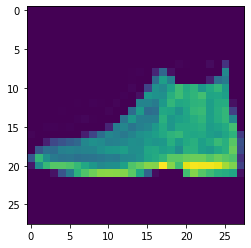

tensor(8.5382, grad_fn=<MaxBackward1>)
Pullover
Pullover


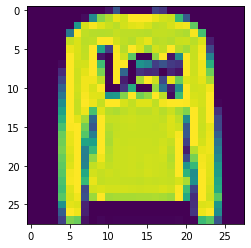

tensor(14.3738, grad_fn=<MaxBackward1>)
Trouser
Trouser


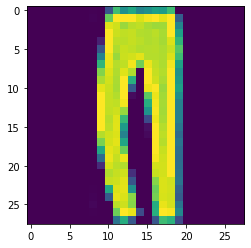

tensor(10.2254, grad_fn=<MaxBackward1>)
Trouser
Trouser


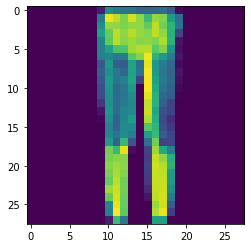

tensor(4.3216, grad_fn=<MaxBackward1>)
Shirt
Shirt


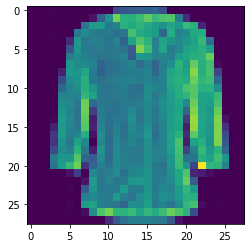

tensor(10.7147, grad_fn=<MaxBackward1>)
Trouser
Trouser


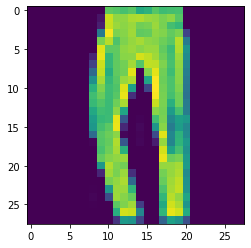

tensor(3.6863, grad_fn=<MaxBackward1>)
Coat
Coat


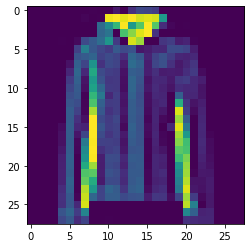

tensor(3.4334, grad_fn=<MaxBackward1>)
Shirt
Shirt


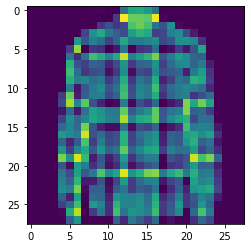

tensor(3.2346, grad_fn=<MaxBackward1>)
Sandal
Sandal


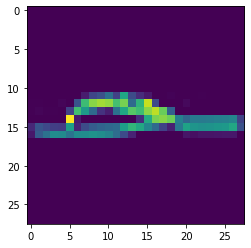

tensor(7.7709, grad_fn=<MaxBackward1>)
Sneaker
Sneaker


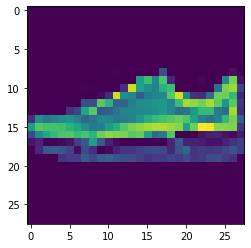

tensor(6.3806, grad_fn=<MaxBackward1>)
Coat
Coat


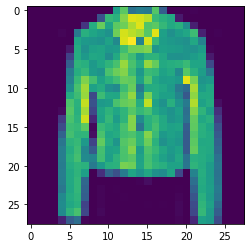

In [5]:
network.eval()
count = 0
for images, labels in test_set:
    output, embedding = network(images[None, ...])
    print(torch.max(output))
    print(test_set.classes[torch.argmax(output)])
    print(test_set.classes[labels])

    plt.figure()
    plt.imshow(images[0])
    plt.show()
    # Just for demonstration
    if count == 10:
        break
    else:
        count+=1
    

In [6]:
embeddings = []
labels = []
network.eval()
count = 0
for image, label in test_set:
    output, embedding = network(image[None, ...])
    embeddings.append(embedding.detach().numpy()[0])
    labels.append(test_set.classes[label])

In [7]:
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(embeddings)

In [8]:
reduced_embeddings_df = pandas.DataFrame(reduced_embeddings, columns=['x','y'])
reduced_embeddings_df['labels'] = labels

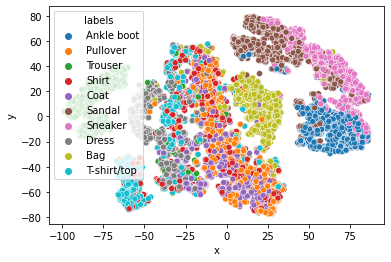

In [9]:
sns.scatterplot(data=reduced_embeddings_df, x='x', y='y', hue='labels');

In [10]:
m = helpers.RunManager()
loss_func = torch.nn.MSELoss()
# get all runs from params using RunBuilder class
for run in helpers.RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    autoencoder = models.Autoencoder()
    loader = torch.utils.data.DataLoader(train_set, batch_size = run.batch_size)
    optimizer = torch.optim.Adam(autoencoder.parameters(), lr=run.lr)

    m.begin_run(run, autoencoder, loader)
    for epoch in range(epochs):
        m.begin_epoch()
        for batch in loader:
            images = batch[0]
            preds = autoencoder(images)
            loss = loss_func(preds, images)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            m.track_loss(loss)
        m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results_ae')

In [11]:
image = Image.fromarray(preds[1][0].detach().numpy()*255)

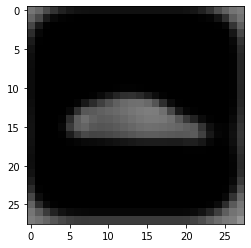

In [12]:
plt.imshow(image);

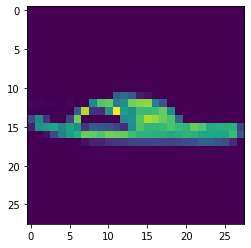

In [13]:
plt.imshow(images[1][0]);

In [15]:
res = autoencoder.decoder(torch.rand((64,20,20)))

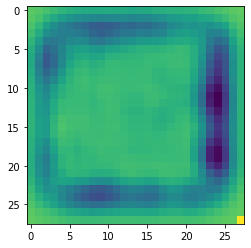

In [16]:
plt.imshow(res[0].detach().numpy()*255);